# Large Growth Fund Prediction Modelling: Linear Regression

This section uses a Linear Regression model to predict the probable direction of prices for the top 4 Large Growth ('High Risk / High Reward') ETFs by fund size (in billions - USD). As mentioned on Notebook 3, those index funds are:<br />

QQQ - Invesco QQQ Trust<br />
VUG - Vanguard Growth Index Fund<br />
IWF - iShares Russell 1000 Growth ETF<br />
IVW - iShares S&P 500 Growth ETF<br />

<br />
The notebook's sections about the Prediction / Machine Learning Model are:<br />
1. Set up libraries, download historical data & visualize data<br />
2. Creating & training the linear regression model<br />
3. Model evaluation<br />
4. Graphing linear regression models (with training data)<br />
5. Prediction from our model<br />
6. Regression evaluation<br />
7. Linear regression scatterplots (price vs time) with test data<br />
8. Graphing 'predicted price vs actual price' scatterplots<br />
9. Plot residual histograms<br />
10. Perform error evaluation metrics<br />
11. Perform accuracy evaluation metrics<br />
12. Results - IMPORTANT<br />
13. Conclusion - IMPORTANT<br />

<br />
Morningstar fund definitions:<br /> 
1. Large Growth Funds are defined as those that invest in large-sized companies projected to grow fast. These tend to have high volatility, and high valuations (high price ratios & low dividend yields). These are known for being ‘high risk but high reward’.<br />
2. Large Value Funds are defined as those that invest in large-sized companies that have slow growth and low valuations (low price ratios and high dividend yields).<br />
3. Large Blend Funds are defined as those that invest in a combination of large Value & large Growth. These funds represent the overall U.S. Stock market and invest in across the spectrum of U.S. industries.<br />

# What is linear regression?

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. The regression model predicts the value of the dependent variable, which is the response or outcome variable being analyzed or studied & simulates a mathematical relationship between variables and makes predictions for continuous or numeric variables such as sales, salary, age, product price, etc. In this case, our prediction is based on the following question - Will prices continue to increase for the top 4 large blend funds on the long run?

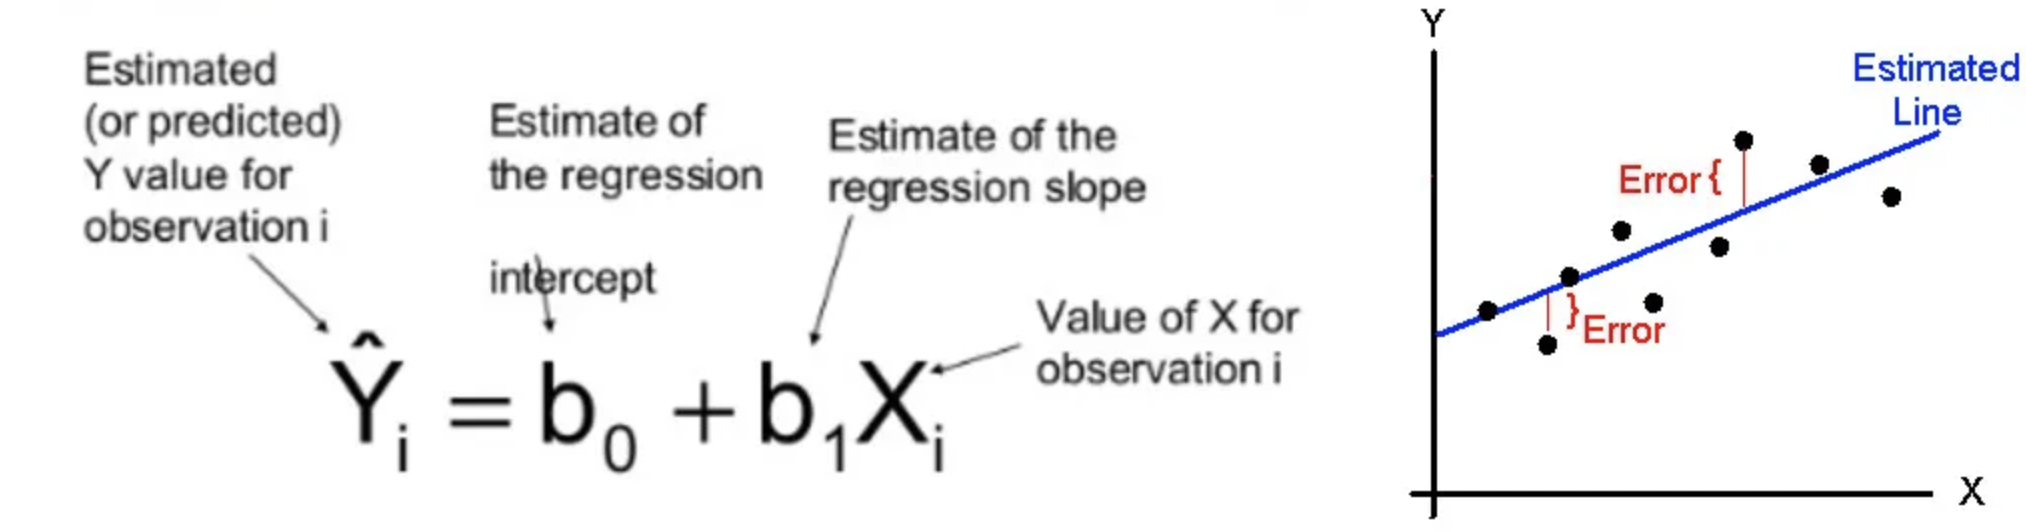

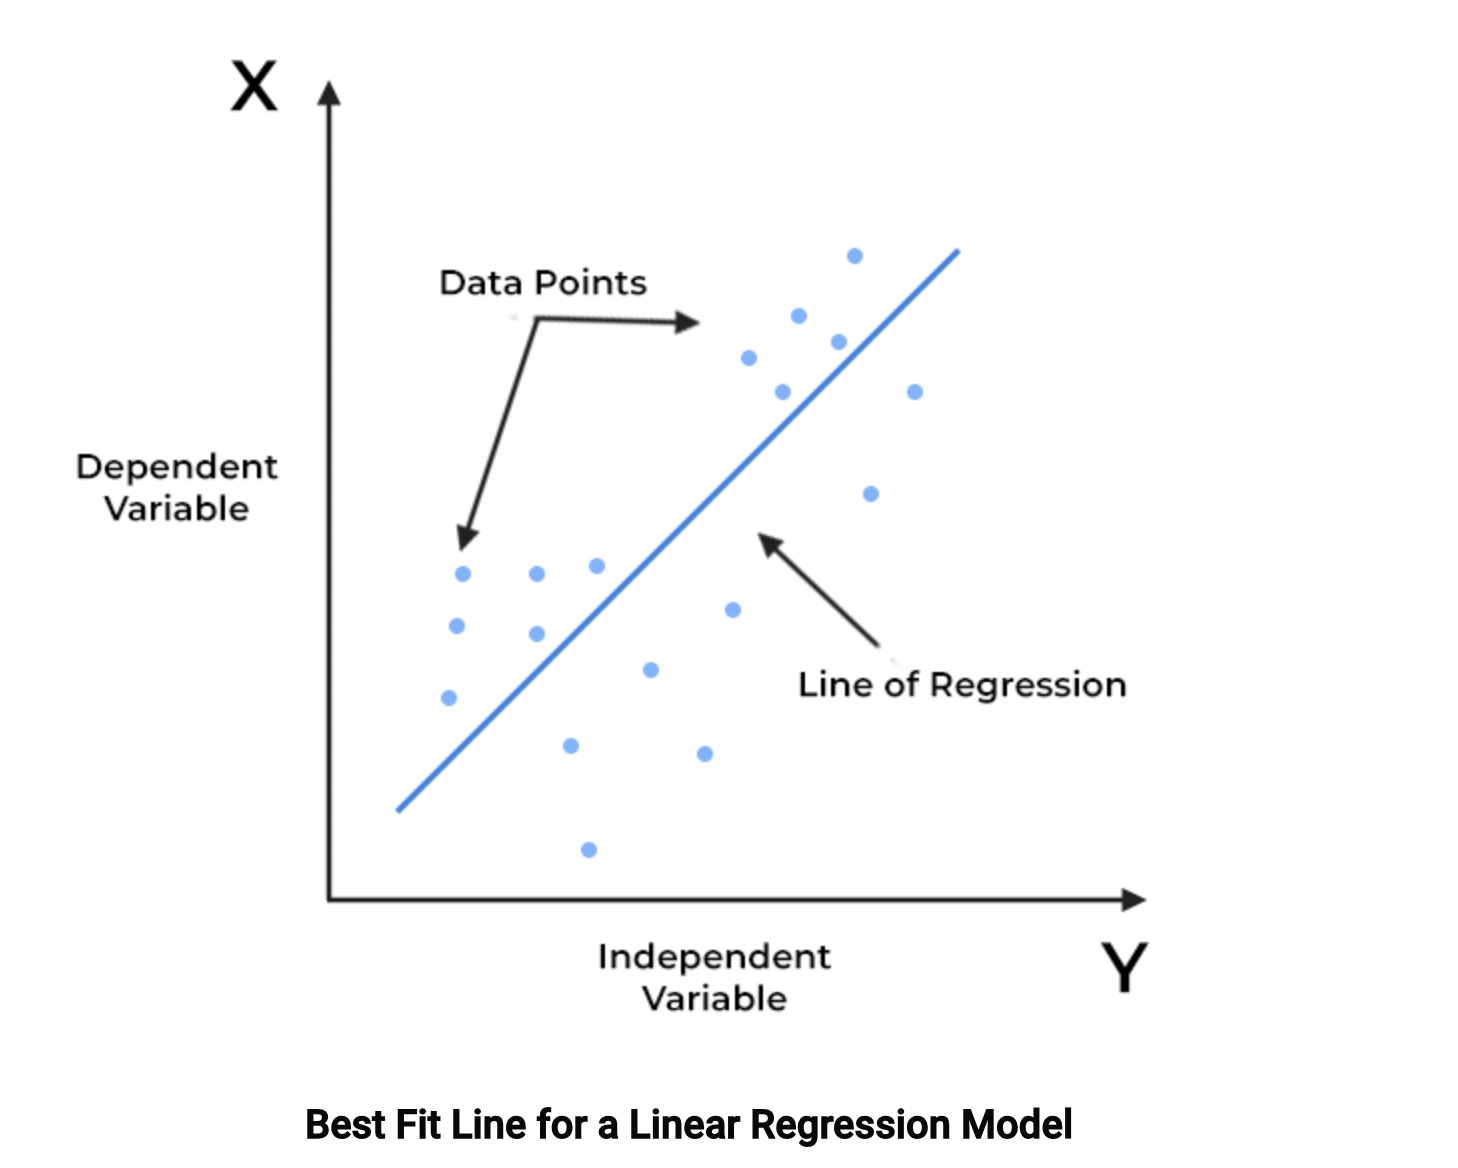

# Step 1 - Set up libraries, download historical data & visualize data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf

# Machine Learning Libraries
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score

In [2]:
# Get data; starting dates are the funds' inception dates
qqq = yf.download("QQQ", '1999-03-10', '2023-12-30')
vug = yf.download("VUG", '2004-01-26', '2023-12-30')
iwf = yf.download("IWF", '2000-05-22', '2023-12-30')
ivw = yf.download("IVW", '2000-05-22', '2023-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Check index
qqq
#vug
#iwf
#ivw

Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-03-10   51.125000   51.156250   50.281250   51.062500   43.604996   
1999-03-11   51.437500   51.734375   50.312500   51.312500   43.818459   
1999-03-12   51.125000   51.156250   49.656250   50.062500   42.751026   
1999-03-15   50.437500   51.562500   49.906250   51.500000   43.978592   
1999-03-16   51.718750   52.156250   51.156250   51.937500   44.352196   
...                ...         ...         ...         ...         ...   
2023-12-22  409.000000  409.970001  406.480011  408.380005  408.165314   
2023-12-26  409.250000  411.559998  409.149994  410.880005  410.664001   
2023-12-27  410.950012  411.790009  410.079987  411.500000  411.500000   
2023-12-28  412.670013  412.920013  410.940002  411.299988  411.299988   
2023-12-29  411.279999  411.640015  407.579987  409.519989  409.519989   

              Volume  
Date                  
1999-03-10   5232000  
1999-03-11   9688600  
1999-03-12   8743600  
1999-03-15   6369000  
1999-03-16   4905800  
...              ...  
2023-12-22  34292400  
2023-12-26  22722500  
2023-12-27  31980500  
2023-12-28  27029200  
2023-12-29  42633400  

[6244 rows x 6 columns]

In [4]:
# Check data types in columns
qqq.info()
#vug.info()
#iwf.info()
#ivw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6244 entries, 1999-03-10 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6244 non-null   float64
 1   High       6244 non-null   float64
 2   Low        6244 non-null   float64
 3   Close      6244 non-null   float64
 4   Adj Close  6244 non-null   float64
 5   Volume     6244 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 341.5 KB


### Check descriptive statistics

In [5]:
# Get descriptive statistics summary of QQQ data set 
qqq.describe()

Open         High          Low        Close    Adj Close  \
count  6244.000000  6244.000000  6244.000000  6244.000000  6244.000000   
mean    112.736324   113.670891   111.708183   112.745154   106.788805   
std     100.203314   100.958492    99.401698   100.244561   100.798753   
min      19.940001    20.530001    19.760000    20.059999    17.130297   
25%      42.000000    42.360000    41.597499    41.967501    36.308868   
50%      66.599998    67.000000    66.165001    66.535000    59.403145   
75%     147.827507   148.209995   146.990005   147.680004   141.469376   
max     412.670013   412.920013   410.940002   411.500000   411.500000   

             Volume  
count  6.244000e+03  
mean   6.674315e+07  
std    4.942726e+07  
min    3.302000e+06  
25%    3.103198e+07  
50%    5.499010e+07  
75%    8.874220e+07  
max    6.167723e+08

In [6]:
# Get descriptive statistics summary of VUG data set 
vug.describe()

Open         High          Low        Close    Adj Close  \
count  5014.000000  5014.000000  5014.000000  5014.000000  5014.000000   
mean    117.288097   118.020854   116.444519   117.286193   110.115577   
std      76.904926    77.502436    76.270671    76.928603    78.997013   
min      32.650002    33.410000    23.290001    32.470001    27.436460   
25%      57.152501    57.650000    56.552500    57.167500    48.082141   
50%      91.599998    92.209999    91.049999    91.545002    82.760216   
75%     154.119995   155.350002   153.512501   154.292507   148.407948   
max     327.049988   328.519989   324.769989   325.670013   320.993164   

             Volume  
count  5.014000e+03  
mean   6.280970e+05  
std    5.354625e+05  
min    0.000000e+00  
25%    3.220750e+05  
50%    5.526000e+05  
75%    8.091000e+05  
max    9.733700e+06

In [7]:
# Get descriptive statistics summary of IWF data set 
iwf.describe()

Open         High          Low        Close    Adj Close  \
count  5936.000000  5936.000000  5936.000000  5936.000000  5936.000000   
mean    102.315237   102.986306   101.569267   102.322018    94.428010   
std      72.219686    72.743355    71.678608    72.246140    74.319931   
min      30.440001    31.350000    19.959999    30.469999    25.399742   
25%      50.330002    50.587501    49.959999    50.279999    40.903062   
50%      66.239998    66.500000    65.834999    66.096874    57.505966   
75%     135.242500   136.325005   134.242504   135.242500   128.478516   
max     310.260010   311.950012   308.369995   309.519989   304.629272   

             Volume  
count  5.936000e+03  
mean   1.792207e+06  
std    1.602309e+06  
min    4.000000e+02  
25%    7.686750e+05  
50%    1.465500e+06  
75%    2.348800e+06  
max    1.710860e+07

In [8]:
# Get descriptive statistics summary of IVW data set 
ivw.describe()

Open         High          Low        Close    Adj Close  \
count  5936.000000  5936.000000  5936.000000  5936.000000  5936.000000   
mean     28.630493    28.808095    28.422037    28.631173    26.022369   
std      18.982547    19.114784    18.841560    18.987406    19.665116   
min       9.107500     9.360000     6.250000     9.082500     7.400142   
25%      14.674375    14.741875    14.582500    14.652500    11.497118   
50%      18.943749    19.038750    18.855000    18.947500    15.970446   
75%      38.502500    38.893125    38.154376    38.408126    36.190554   
max      85.089996    85.089996    84.320000    84.809998    83.183189   

             Volume  
count  5.936000e+03  
mean   2.576093e+06  
std    2.738862e+06  
min    0.000000e+00  
25%    1.022300e+06  
50%    1.863050e+06  
75%    3.141475e+06  
max    3.640720e+07

In [9]:
# Create a new DataFrame with only closing price and date
qqq_df = pd.DataFrame(qqq, columns=['Close'])
vug_df = pd.DataFrame(vug, columns=['Close'])
iwf_df = pd.DataFrame(iwf, columns=['Close'])
ivw_df = pd.DataFrame(ivw, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
qqq_df = qqq_df.reset_index()
vug_df = vug_df.reset_index()
iwf_df = iwf_df.reset_index()
ivw_df = ivw_df.reset_index()

In [10]:
# Check for missing values in the columns
qqq_df.isna().values.any()
#vug_df.isna().values.any()
#iwf_df.isna().values.any()
#ivw_df.isna().values.any()

False

In [11]:
# Format dates & create plot for IVV
years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

### Data visualization

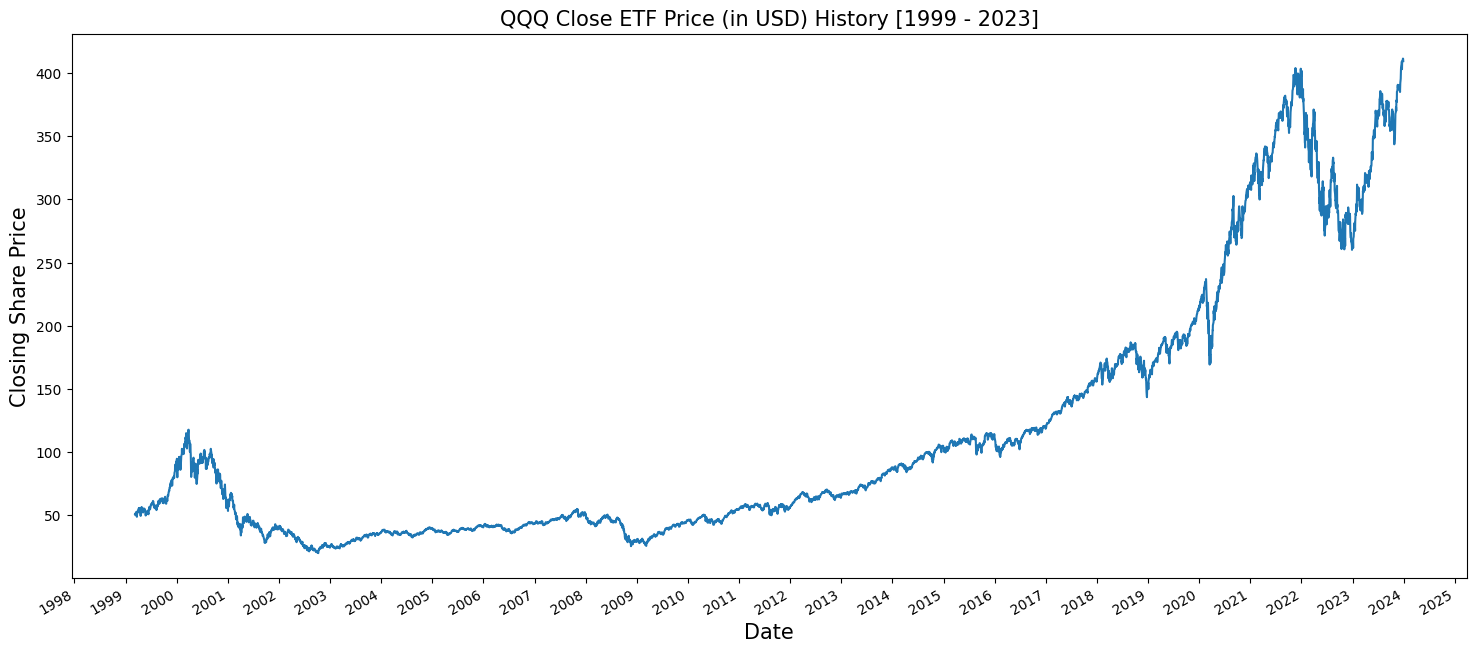

In [13]:
# QQQ Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
#plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(qqq_df['Date'], qqq_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('QQQ Close ETF Price (in USD) History [1999 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

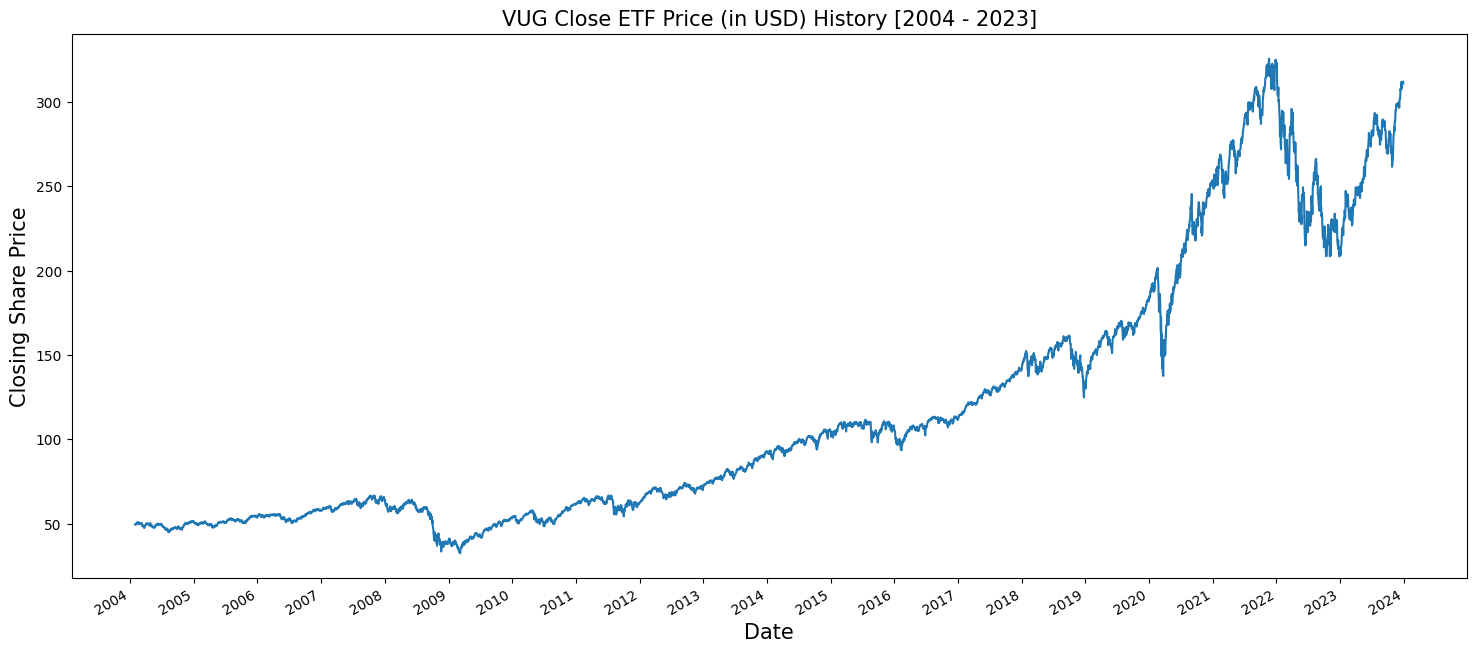

In [14]:
# VUG Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(vug_df['Date'], vug_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('VUG Close ETF Price (in USD) History [2004 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

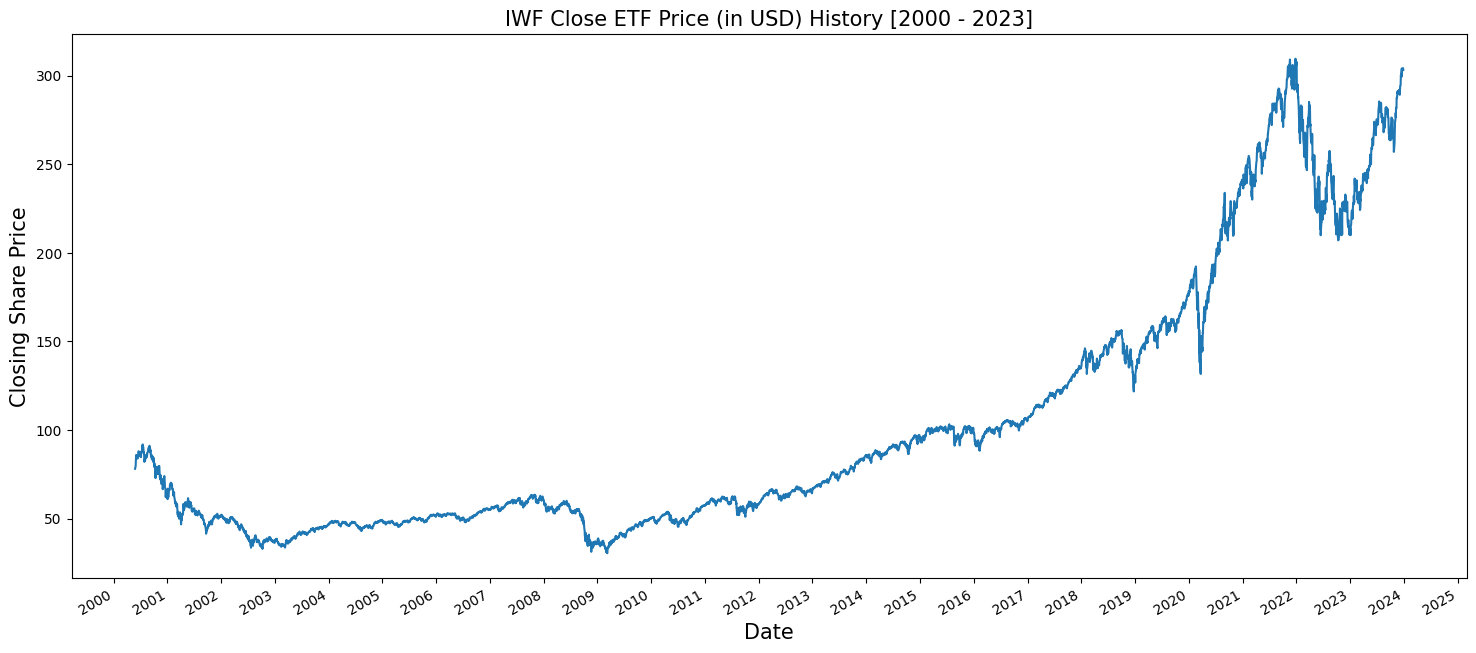

In [15]:
# IWF Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(iwf_df['Date'], iwf_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('IWF Close ETF Price (in USD) History [2000 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

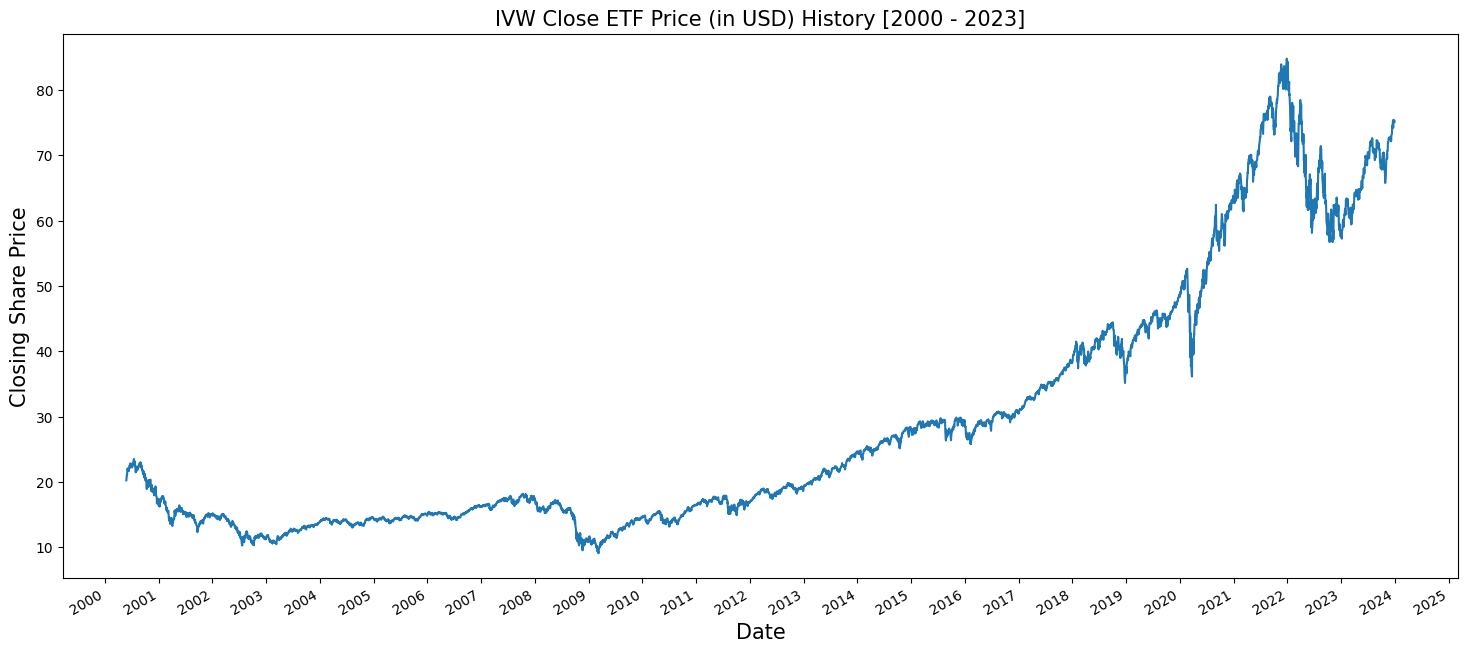

In [16]:
# IVW Graph
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 8]
ax.plot(ivw_df['Date'], ivw_df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('IVW Close ETF Price (in USD) History [2000 - 2023]', fontsize=15)
# Set x label
plt.xlabel('Date', fontsize=15)
# Set y label
plt.ylabel('Closing Share Price', fontsize=15)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Step 2 - Creating & training the linear regression model

In [17]:
# Train test Split
# Split data into train and test set: 80% / 20%
train_qqq, test_qqq = train_test_split(qqq_df, test_size=0.20)
train_vug, test_vug = train_test_split(vug_df, test_size=0.20)
train_iwf, test_iwf = train_test_split(iwf_df, test_size=0.20)
train_ivw, test_ivw = train_test_split(ivw_df, test_size=0.20)

In [18]:
# Reshape index column to 2D array for .fit() method
X_train_qqq = np.array(train_qqq.index).reshape(-1, 1)
X_train_vug = np.array(train_vug.index).reshape(-1, 1)
X_train_iwf = np.array(train_iwf.index).reshape(-1, 1)
X_train_ivw = np.array(train_ivw.index).reshape(-1, 1)

# Train Close column
y_train_qqq = train_qqq['Close']
y_train_vug = train_vug['Close']
y_train_iwf = train_iwf['Close']
y_train_ivw = train_ivw['Close']

In [19]:
# Create LinearRegression Object
qqq_model = LinearRegression()
vug_model = LinearRegression()
iwf_model = LinearRegression()
ivw_model = LinearRegression()

In [20]:
# Fit linear model using the train data set for iwd
qqq_model.fit(X_train_qqq, y_train_qqq)

LinearRegression()

In [21]:
# Fit linear model using the train data set for iwd
vug_model.fit(X_train_vug, y_train_vug)

LinearRegression()

In [22]:
# Fit linear model using the train data set for iwd
iwf_model.fit(X_train_iwf, y_train_iwf)

LinearRegression()

In [23]:
# Fit linear model using the train data set for iwd
ivw_model.fit(X_train_ivw, y_train_ivw)

LinearRegression()

# Step 3 - Model Evaluation

Interpreting the coefficients:<br />

1. The __slope__ coefficient tells us that with a 1 unit increase in date the closing price increases by x decimal result<br />
2. The __intercept__ coefficient is the price at wich the closing price measurement started, the ETF price value at date zero

In [24]:
# The coefficient
print('QQQ Model Slope: ', np.asscalar(np.squeeze(qqq_model.coef_)))
# The Intercept
print('QQQ Model Intercept: ', qqq_model.intercept_)

QQQ Model Slope:  0.045112173765727924
QQQ Model Intercept:  -28.048845393404193


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/1642289582.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('QQQ Model Slope: ', np.asscalar(np.squeeze(qqq_model.coef_)))


In [25]:
# The coefficient
print('VUG Model Slope: ', np.asscalar(np.squeeze(vug_model.coef_)))
# The Intercept
print('VUG Model Intercept: ', vug_model.intercept_)

VUG Model Slope:  0.04752860525941046
VUG Model Intercept:  -1.5753511590260985


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/1195321083.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('VUG Model Slope: ', np.asscalar(np.squeeze(vug_model.coef_)))


In [26]:
# The coefficient
print('IWF Model Slope: ', np.asscalar(np.squeeze(iwf_model.coef_)))
# The Intercept
print('IWF Model Intercept: ', iwf_model.intercept_)

IWF Model Slope:  0.035448100651680164
IWF Model Intercept:  -3.08845635929859


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/839555155.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('IWF Model Slope: ', np.asscalar(np.squeeze(iwf_model.coef_)))


In [27]:
# The coefficient
print('IVW Model Slope: ', np.asscalar(np.squeeze(ivw_model.coef_)))
# The Intercept
print('IVW Model Intercept: ', ivw_model.intercept_)

IVW Model Slope:  0.009463264471957451
IVW Model Intercept:  0.602089695192241


/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/4054989795.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('IVW Model Slope: ', np.asscalar(np.squeeze(ivw_model.coef_)))


# Step 4 - Graphing linear regression models (with training data)

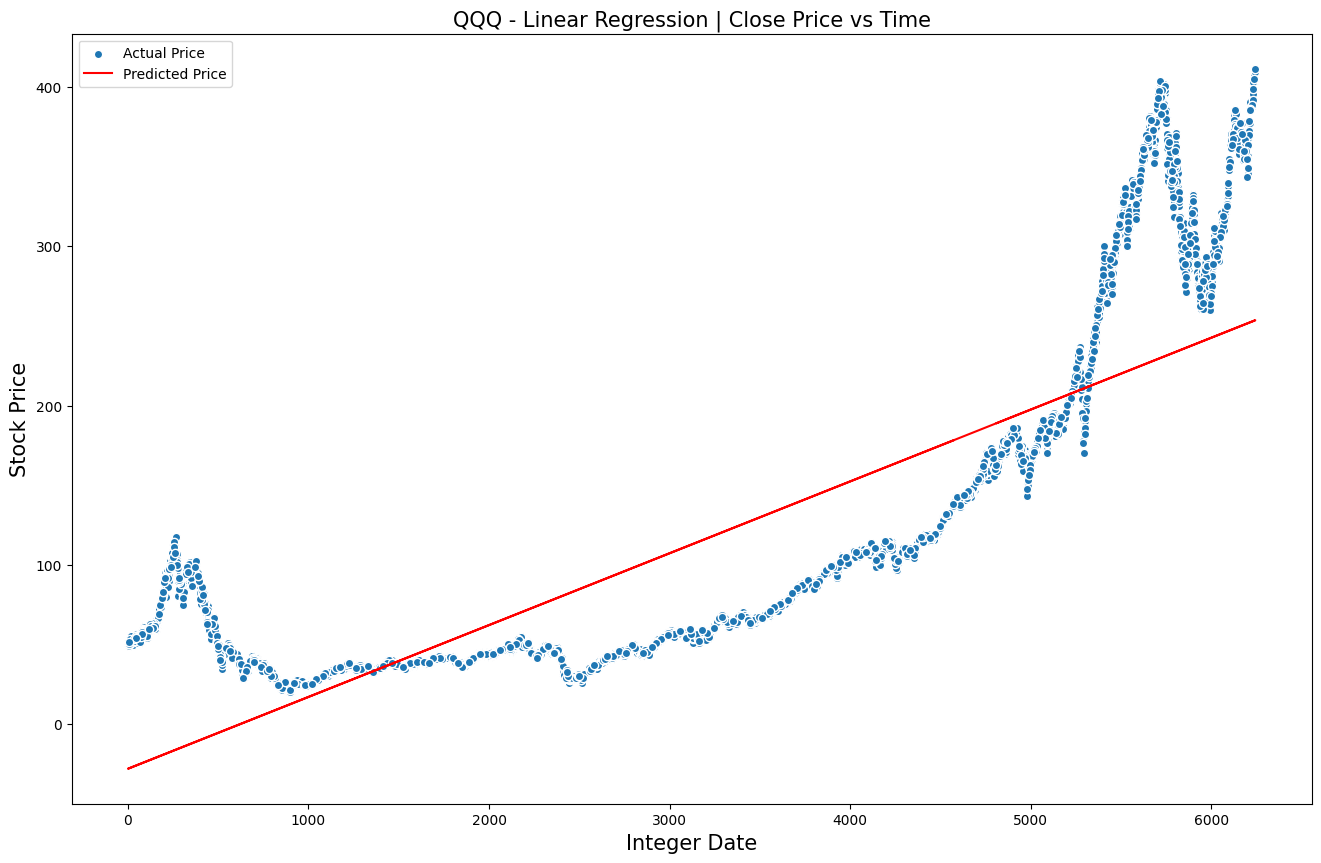

In [28]:
# Train set graph for QQQ
plt.figure(1, figsize=(16,10))
plt.title('QQQ - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_qqq, y_train_qqq, edgecolor='w', label='Actual Price')
plt.plot(X_train_qqq, qqq_model.predict(X_train_qqq), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

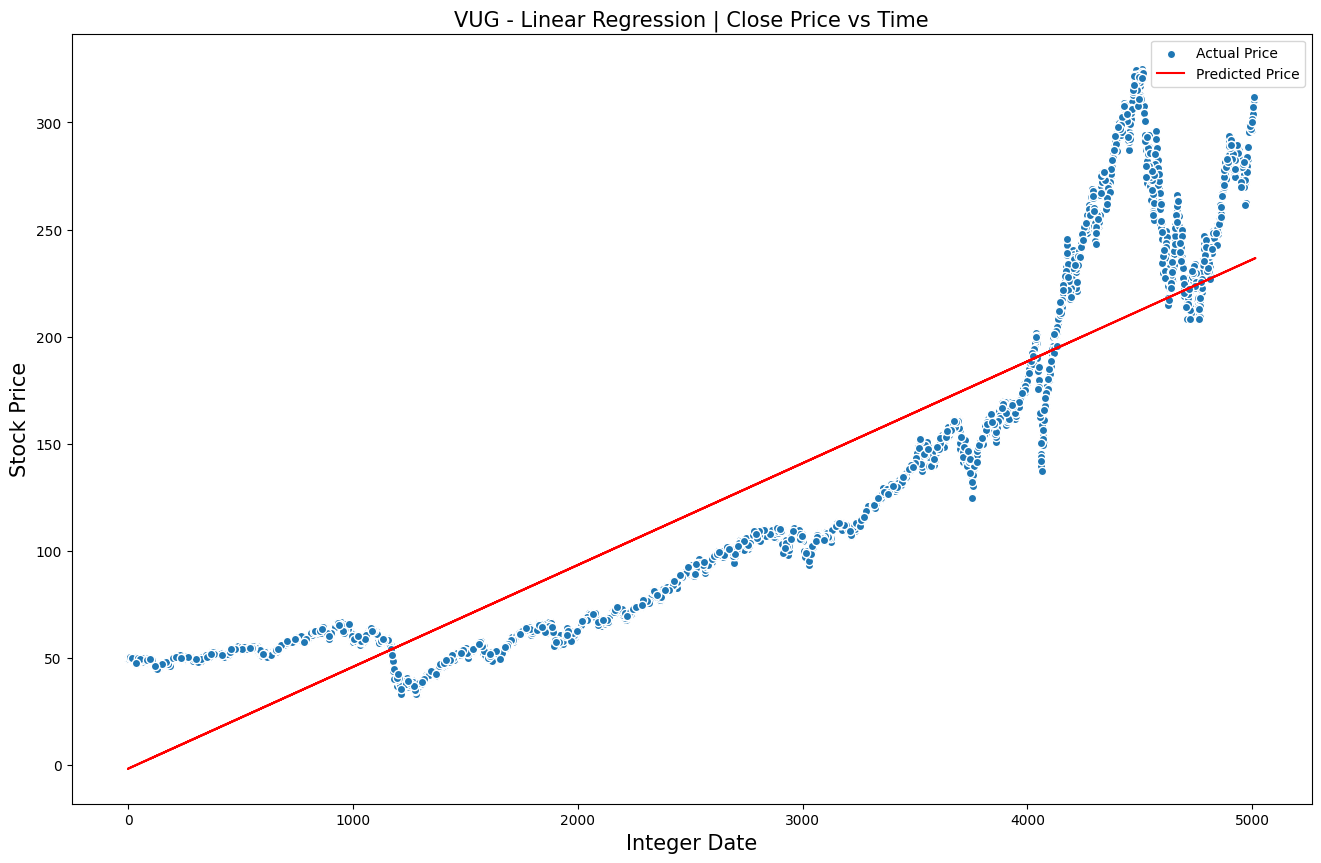

In [29]:
# Train set graph for VUG
plt.figure(1, figsize=(16,10))
plt.title('VUG - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_vug, y_train_vug, edgecolor='w', label='Actual Price')
plt.plot(X_train_vug, vug_model.predict(X_train_vug), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

In [30]:
# Train set graph for IWF
plt.figure(1, figsize=(16,10))
plt.title('IWF - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_iwf, y_train_iwf, edgecolor='w', label='Actual Price')
plt.plot(X_train_iwf, iwf_model.predict(X_train_iwf), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

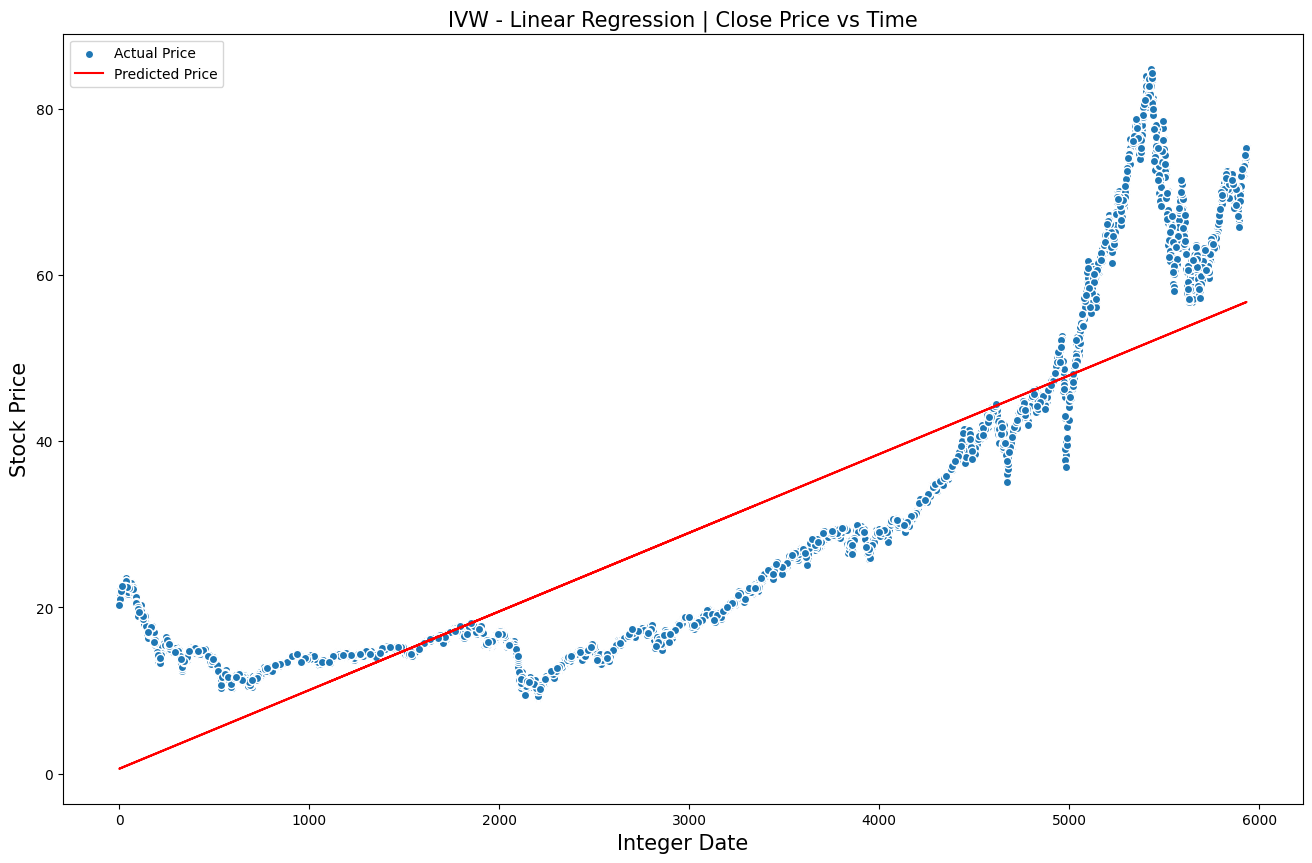

In [31]:
# Train set graph for IVW
plt.figure(1, figsize=(16,10))
plt.title('IVW - Linear Regression | Close Price vs Time', fontsize=15)
plt.scatter(X_train_ivw, y_train_ivw, edgecolor='w', label='Actual Price')
plt.plot(X_train_ivw, ivw_model.predict(X_train_ivw), color='r', label='Predicted Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Stock Price', fontsize=15)
plt.legend()
plt.show()

# Step 5 - Prediction from our model

In [32]:
# Create test arrays for QQQ
X_test_qqq = np.array(test_qqq.index).reshape(-1, 1)
y_test_qqq = test_qqq['Close']

In [33]:
# Generate array with predicted values
y_pred_qqq = qqq_model.predict(X_test_qqq)

In [34]:
# Create test arrays for VUG
X_test_vug = np.array(test_vug.index).reshape(-1, 1)
y_test_vug = test_vug['Close']

In [35]:
# Generate array with predicted values
y_pred_vug = vug_model.predict(X_test_vug)

In [36]:
# Create test arrays for IWF
X_test_iwf = np.array(test_iwf.index).reshape(-1, 1)
y_test_iwf = test_iwf['Close']

In [37]:
# Generate array with predicted values
y_pred_iwf = iwf_model.predict(X_test_iwf)

In [38]:
# Create test arrays for IVW
X_test_ivw = np.array(test_ivw.index).reshape(-1, 1)
y_test_ivw = test_ivw['Close']

In [39]:
# Generate array with predicted values
y_pred_ivw = ivw_model.predict(X_test_ivw)

# Step 6 - Regression evaluation

Let's have a look at how the predicted values compare with the actual value on random sample from our data set.

In [40]:
# Get number of rows in data set for random sample
qqq_df.shape

(6244, 2)

In [41]:
# Get number of rows in data set for random sample
vug_df.shape

(5014, 2)

In [42]:
# Get number of rows in data set for random sample
iwf_df.shape

(5936, 2)

In [43]:
# Get number of rows in data set for random sample
ivw_df.shape

(5936, 2)

In [44]:
# Generate 40 random numbers that will serve as 'bins' or segments
randints_qqq = np.random.randint(6244, size=40)
randints_vug = np.random.randint(5014, size=40)
randints_iwf = np.random.randint(5936, size=40)
randints_ivw = np.random.randint(5936, size=40)

# Select row numbers == random numbers
qqq_df_sample = qqq_df[qqq_df.index.isin(randints_qqq)]
vug_df_sample = vug_df[vug_df.index.isin(randints_vug)]
iwf_df_sample = iwf_df[iwf_df.index.isin(randints_iwf)]
ivw_df_sample = ivw_df[ivw_df.index.isin(randints_ivw)]

In [45]:
qqq_df_sample.head()
#vug_df_sample.head()
#iwf_df_sample.head()
#ivw_df_sample.head()

Date     Close
15  1999-03-31  52.46875
33  1999-04-27  55.71875
120 1999-08-30  59.03125
379 2000-09-07  98.12500
589 2001-07-10  40.50000

### Comparison bar charts - predicted price vs. actual price in randomized samples

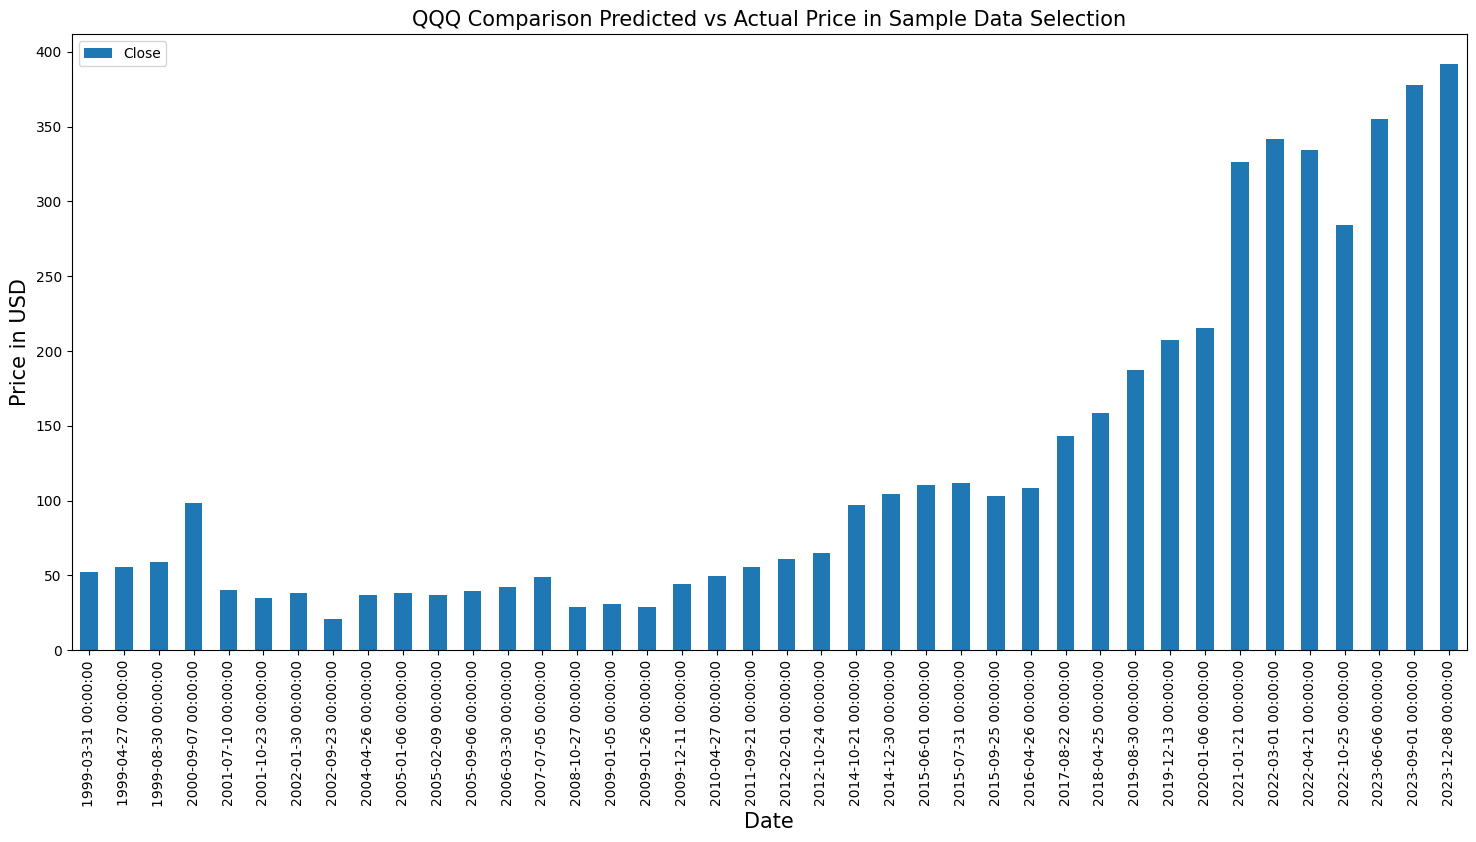

In [46]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
qqq_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('QQQ Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

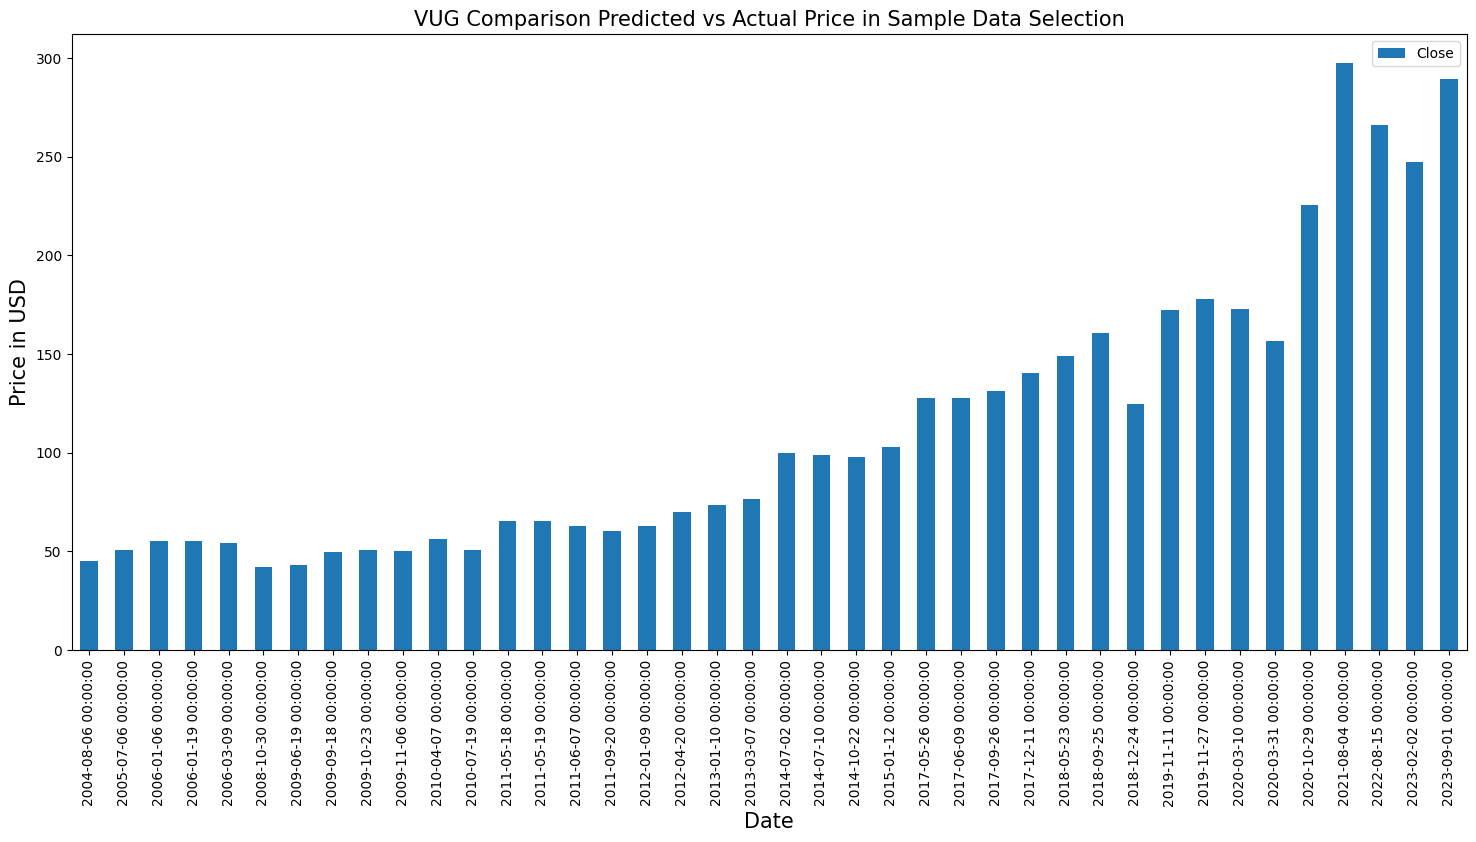

In [47]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
vug_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('VUG Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

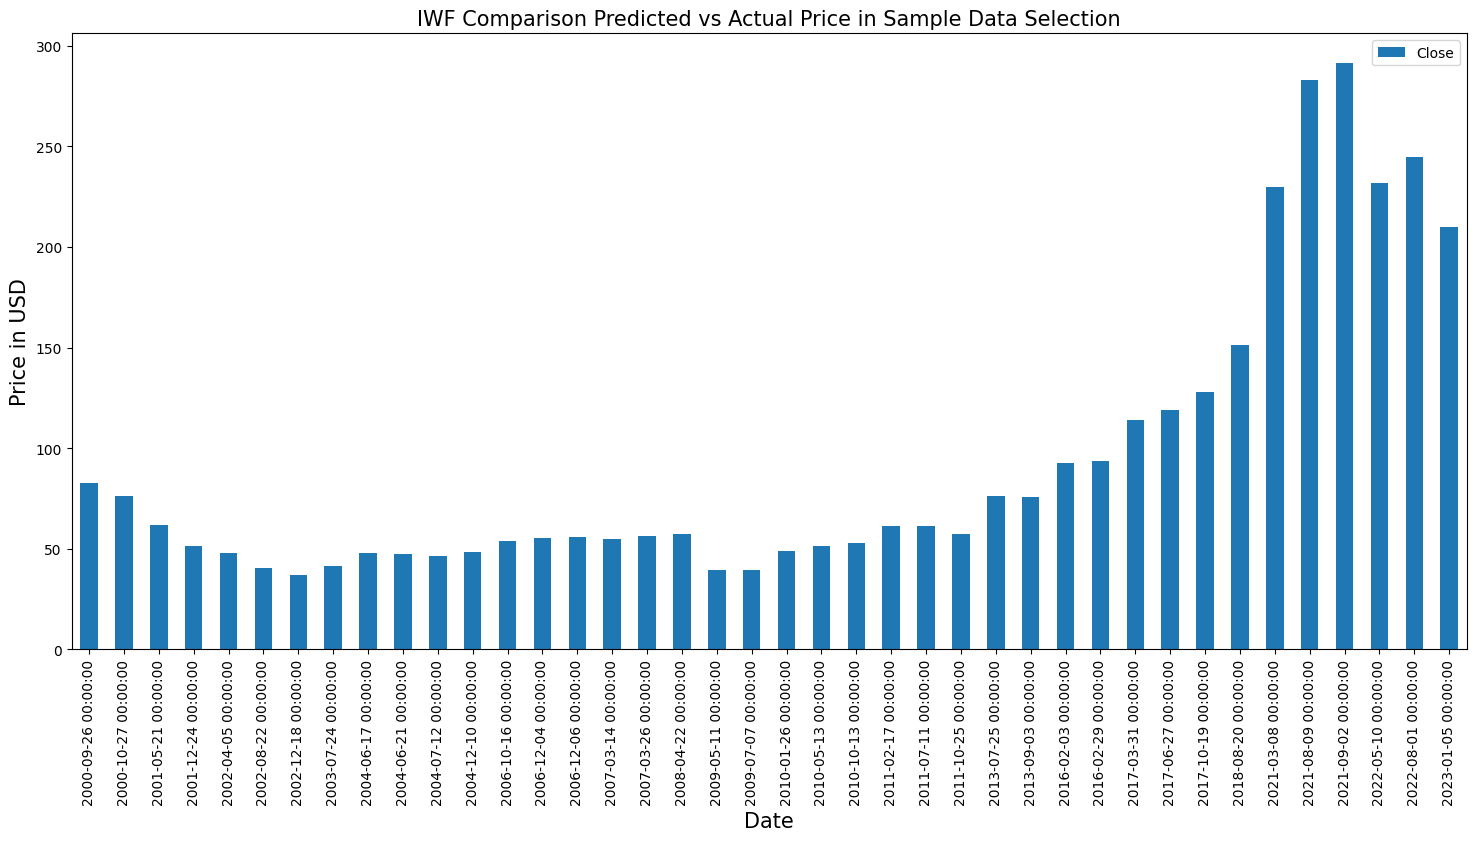

In [48]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
iwf_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('IWF Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

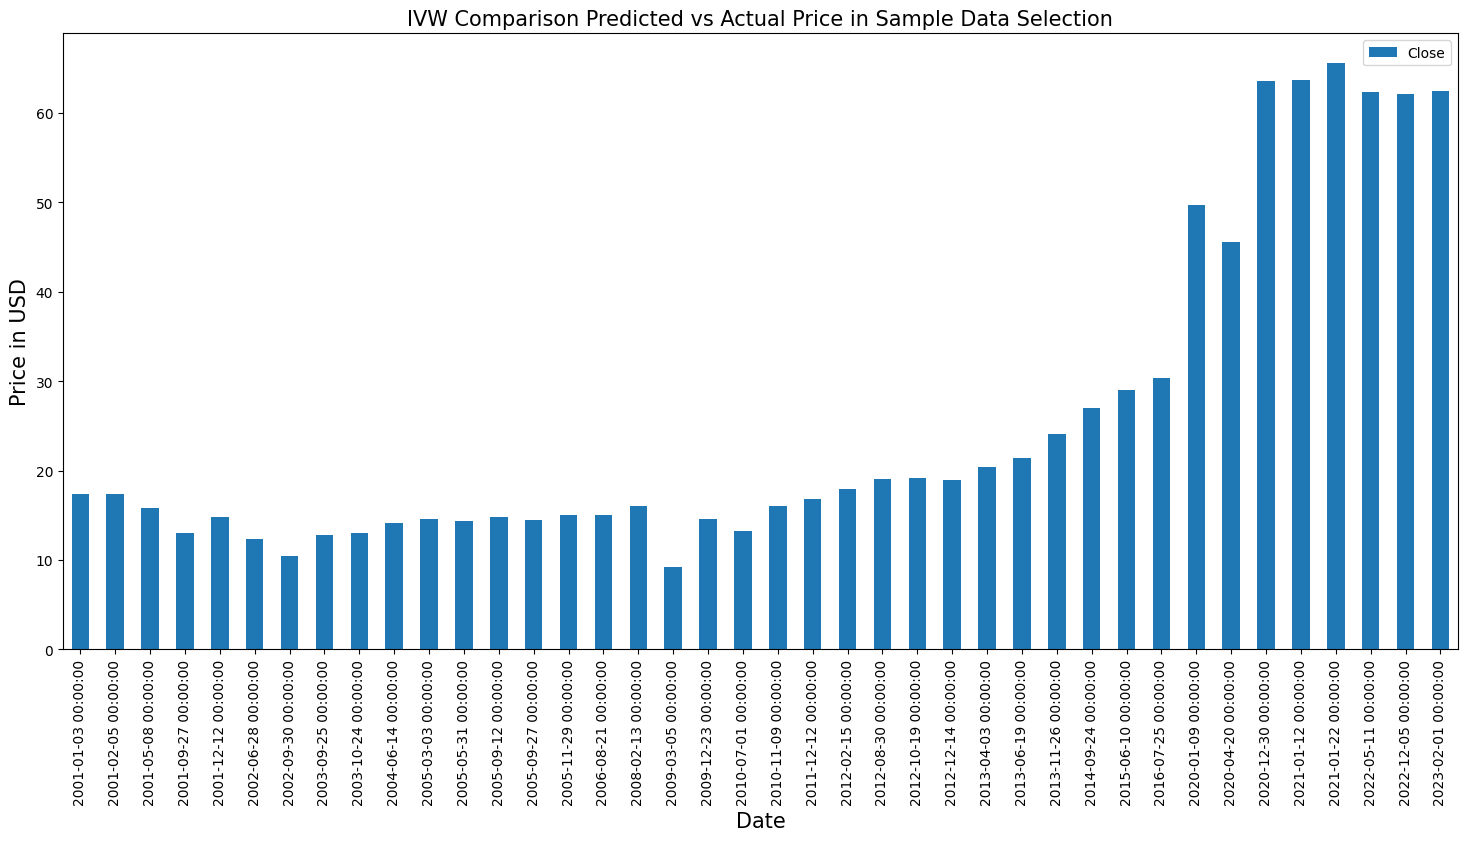

In [49]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ivw_df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)
plt.title('IVW Comparison Predicted vs Actual Price in Sample Data Selection', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

We can see some larger variations between predicted and actual values in the random sample, but our models still point towards increasing prices with respect to time.

# Step 7 - Linear regression scatterplots (price vs time) with test data

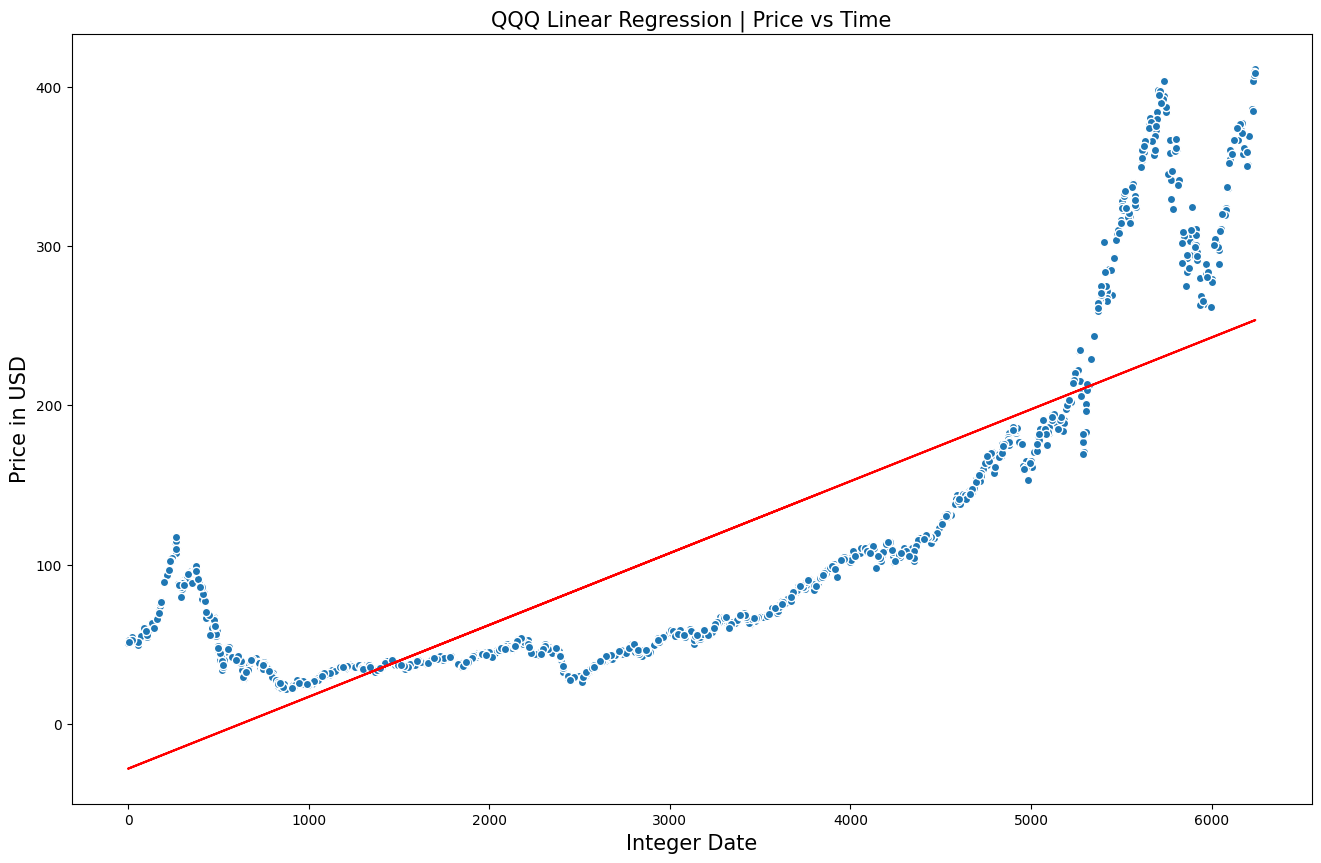

In [50]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('QQQ Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_qqq, qqq_model.predict(X_test_qqq), color='r', label='Predicted Price')
plt.scatter(X_test_qqq, y_test_qqq, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

In [51]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('VUG Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_vug, vug_model.predict(X_test_vug), color='r', label='Predicted Price')
plt.scatter(X_test_vug, y_test_vug, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

In [52]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('IWF Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_iwf, iwf_model.predict(X_test_iwf), color='r', label='Predicted Price')
plt.scatter(X_test_iwf, y_test_iwf, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

In [53]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('IVW Linear Regression | Price vs Time', fontsize=15)
plt.plot(X_test_ivw, ivw_model.predict(X_test_ivw), color='r', label='Predicted Price')
plt.scatter(X_test_ivw, y_test_ivw, edgecolor='w', label='Actual Price')
plt.xlabel('Integer Date', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.show()

# Step 8 - Graphing 'predicted price vs actual price' scatterplots

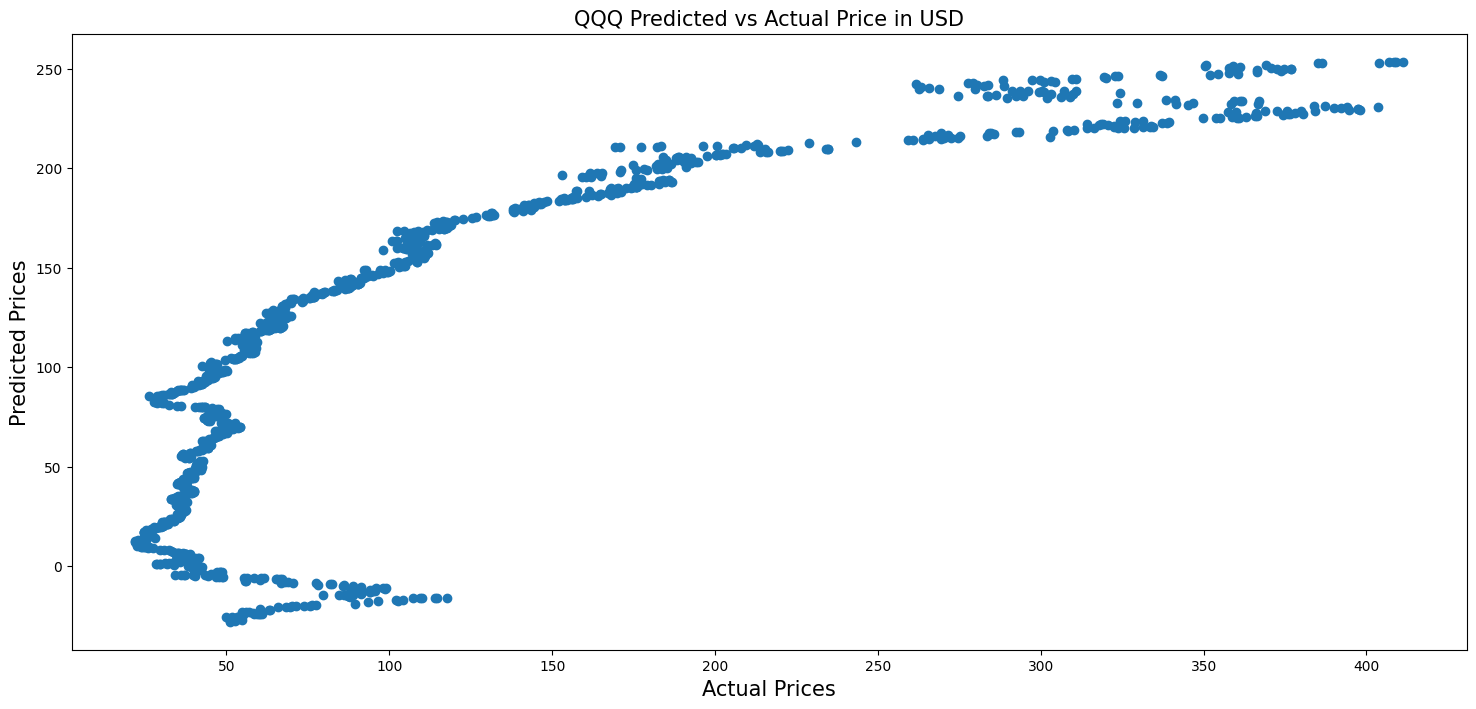

In [54]:
# Plot predicted vs actual prices
plt.scatter(y_test_qqq, y_pred_qqq)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('QQQ Predicted vs Actual Price in USD', fontsize=15)
plt.show()

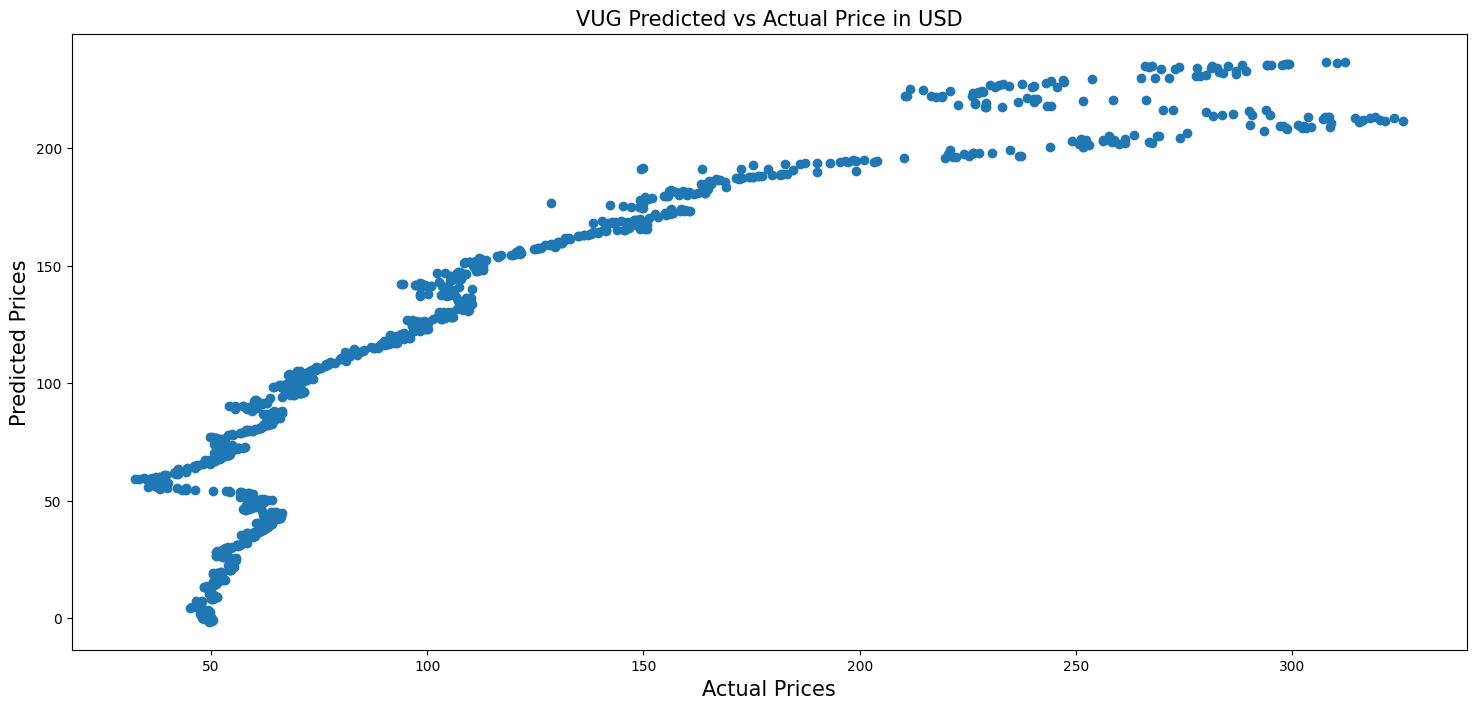

In [55]:
# Plot predicted vs actual prices
plt.scatter(y_test_vug, y_pred_vug)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('VUG Predicted vs Actual Price in USD', fontsize=15)
plt.show()

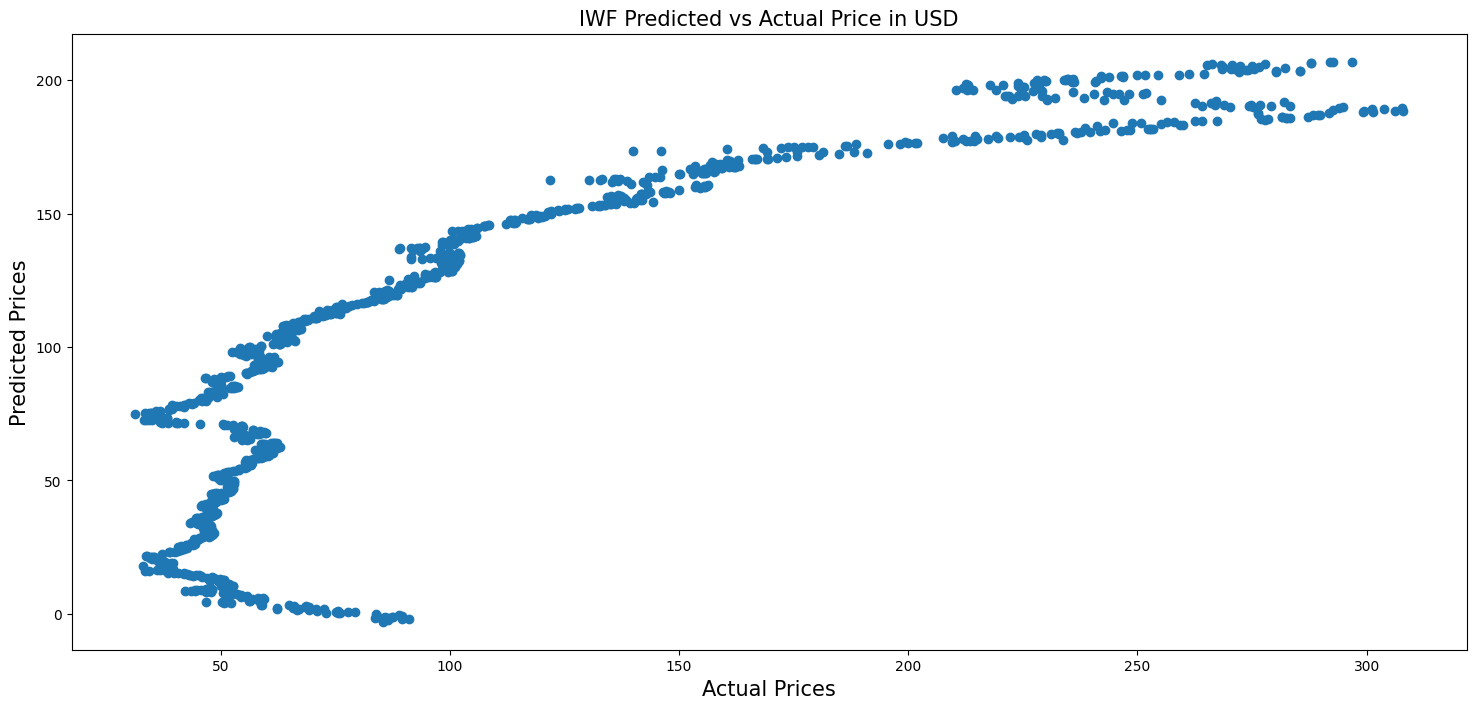

In [56]:
# Plot predicted vs actual prices
plt.scatter(y_test_iwf, y_pred_iwf)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('IWF Predicted vs Actual Price in USD', fontsize=15)
plt.show()

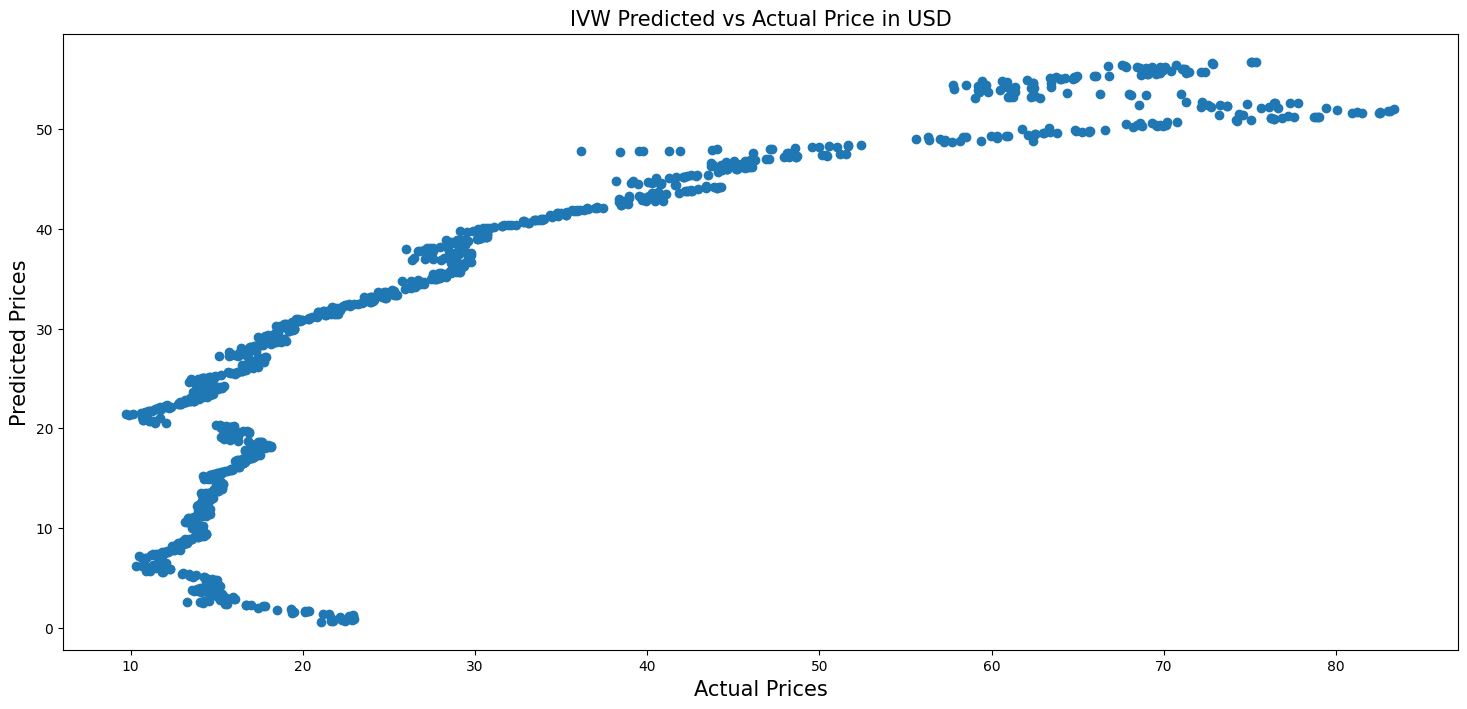

In [57]:
# Plot predicted vs actual prices
plt.scatter(y_test_ivw, y_pred_ivw)
plt.xlabel('Actual Prices', fontsize=15)
plt.ylabel('Predicted Prices', fontsize=15)
plt.title('IVW Predicted vs Actual Price in USD', fontsize=15)
plt.show()

The data points are mostly close to a diagonal, which indicates, that the predicted values are close to the actual value and the model's performance is largerly quite good. Yet there are some areas where the models seem to be quite random and show no relationship between the predicted and actual value; for instance 'zigzag' sections where the margin of error or difference is too large (for example, data points where the actual price was 200 USD but it predicted a price of 150 USD where the difference is relatively large.

# Step 9 - Plot residual histogram

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true. However, stock or ETF data in most cases will never be normally distributed.

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/1206854067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_qqq - y_pred_qqq), label='Residual Histogram & Distribution')


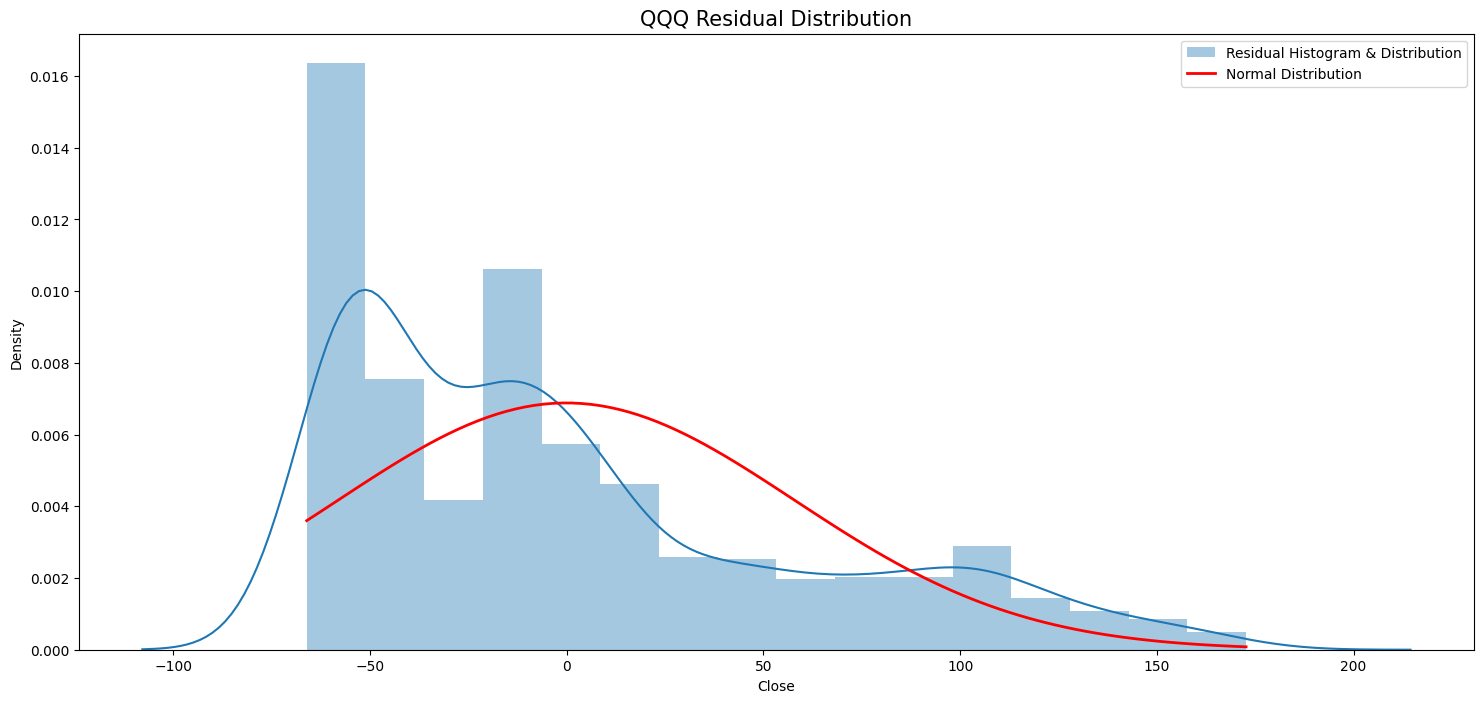

In [58]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_qqq - y_pred_qqq)
ax = sns.distplot((y_test_qqq - y_pred_qqq), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_qqq - y_pred_qqq), max(y_test_qqq - y_pred_qqq), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('QQQ Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/766760403.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_vug - y_pred_vug), label='Residual Histogram & Distribution')


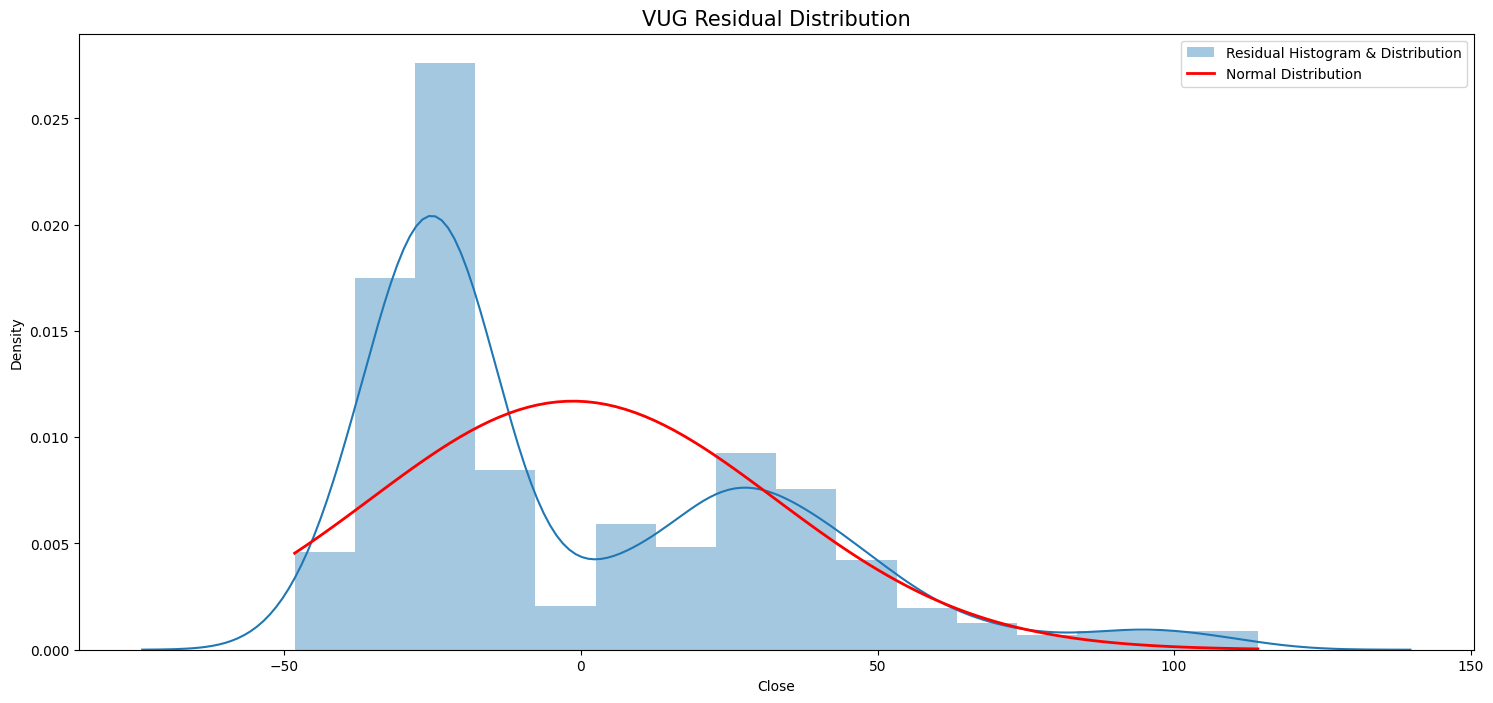

In [59]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_vug - y_pred_vug)
ax = sns.distplot((y_test_vug - y_pred_vug), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_vug - y_pred_vug), max(y_test_vug - y_pred_vug), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('VUG Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/1187185705.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_iwf - y_pred_iwf), label='Residual Histogram & Distribution')


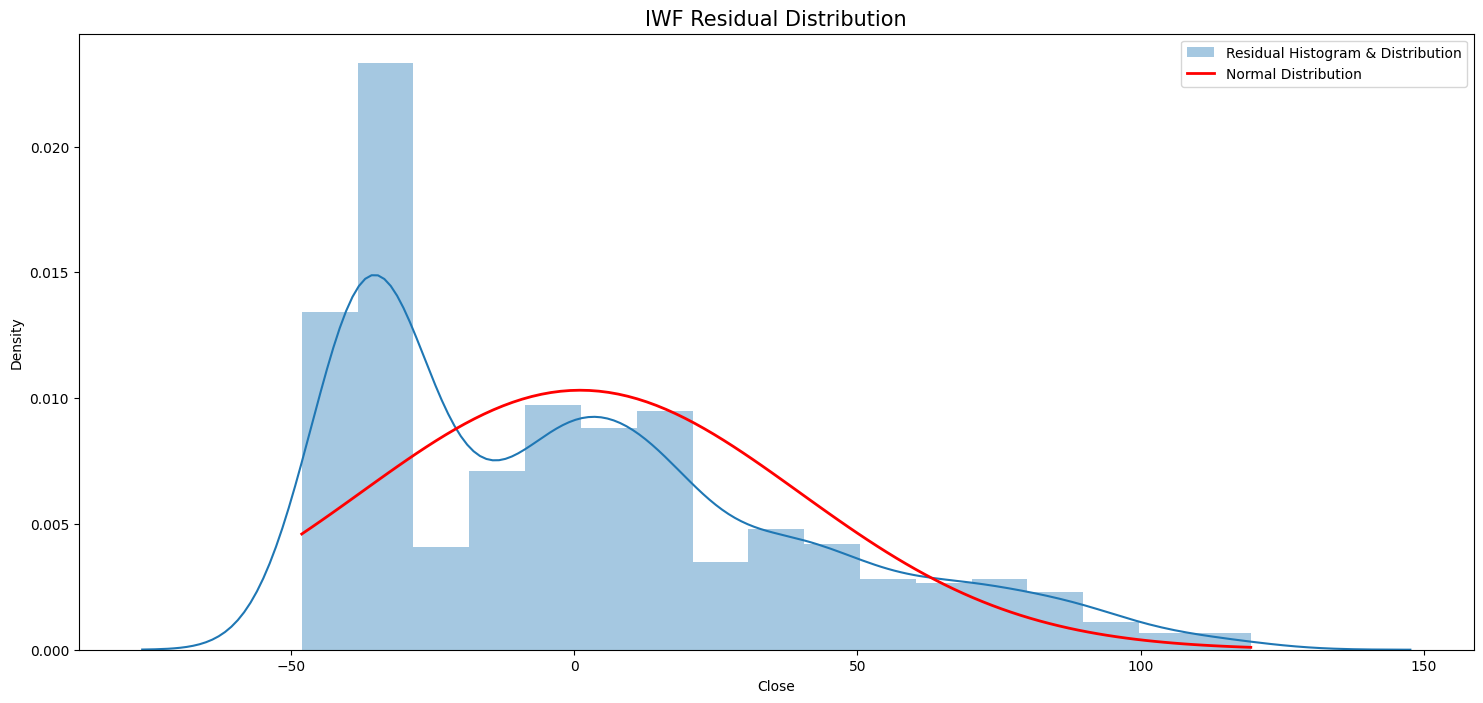

In [60]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_iwf - y_pred_iwf)
ax = sns.distplot((y_test_iwf - y_pred_iwf), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_iwf - y_pred_iwf), max(y_test_iwf - y_pred_iwf), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('IWF Residual Distribution', fontsize=15)
plt.legend()
plt.show()

/var/folders/4k/gqcmmjbx2w55jxw4q_lcpc5r0000gn/T/ipykernel_3563/4172719476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test_ivw - y_pred_ivw), label='Residual Histogram & Distribution')


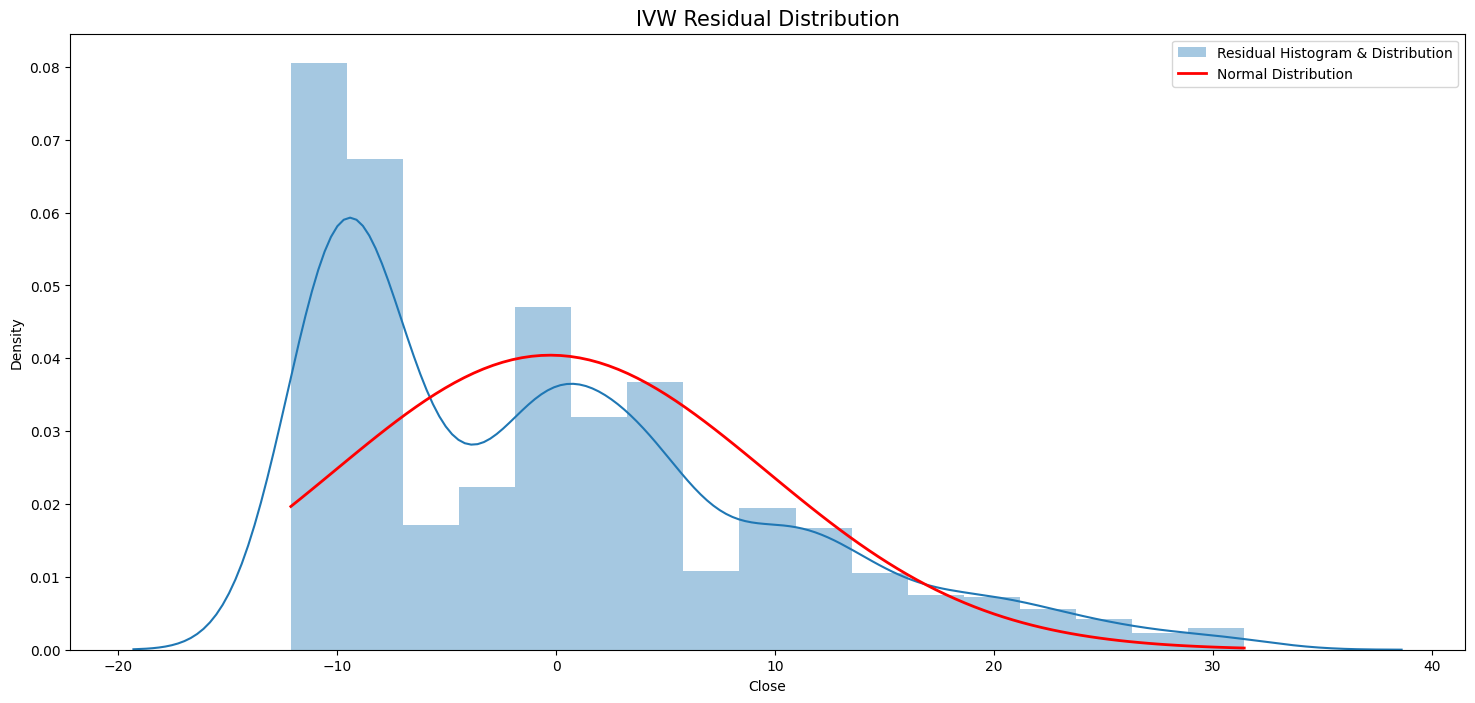

In [61]:
# Fit a normal distribution to the data:
mu, std = norm.fit(y_test_ivw - y_pred_ivw)
ax = sns.distplot((y_test_ivw - y_pred_ivw), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test_ivw - y_pred_ivw), max(y_test_ivw - y_pred_ivw), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn puts the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 
plt.title('IVW Residual Distribution', fontsize=15)
plt.legend()
plt.show()

In [62]:
# Add new column for predictions to df
qqq_df['Prediction'] = qqq_model.predict(np.array(qqq_df.index).reshape(-1, 1))
vug_df['Prediction'] = vug_model.predict(np.array(vug_df.index).reshape(-1, 1))
iwf_df['Prediction'] = iwf_model.predict(np.array(iwf_df.index).reshape(-1, 1))
ivw_df['Prediction'] = ivw_model.predict(np.array(ivw_df.index).reshape(-1, 1))

In [63]:
qqq_df.tail()
#vug_df.tail()
#iwf_df.tail()
#ivw_df.tail()

Date       Close  Prediction
6239 2023-12-22  408.380005  253.406007
6240 2023-12-26  410.880005  253.451119
6241 2023-12-27  411.500000  253.496231
6242 2023-12-28  411.299988  253.541343
6243 2023-12-29  409.519989  253.586455

# Step 10 - Perform error evaluation metrics

An error metric is a way to quantify the performance of a model and provides a way for the forecaster to quantitatively compare different models. the following types of error are: <br />

1. __Mean Absolute Error (MAE)__: Is the absolute value of difference between observed data points vs. predicted points divided by the sample size <br />
2. __Mean Squared Error (MSE)__: Is the average squared difference between observed data points vs. predicted points <br />
3. __Root Mean Squared Error (RMSE)__: is the square root of the mean of the squared errors (MSE)

### Error evaluation for QQQ

In [66]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_qqq, y_pred_qqq))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_qqq, y_pred_qqq))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_qqq, y_pred_qqq)))

Mean Absolute Error: 46.6256086427819
Mean Squared Error: 3359.2571947465244
Root Mean Squared Error: 57.959099326564115


### Error evaluation for VUG

In [67]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_vug, y_pred_vug))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_vug, y_pred_vug))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_vug, y_pred_vug)))

Mean Absolute Error: 29.54506869542139
Mean Squared Error: 1165.076044372113
Root Mean Squared Error: 34.133210285177


### Error evaluation for IWF

In [68]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_iwf, y_pred_iwf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_iwf, y_pred_iwf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_iwf, y_pred_iwf)))

Mean Absolute Error: 31.525308254904886
Mean Squared Error: 1497.0367573836495
Root Mean Squared Error: 38.69155925242158


### Error evaluation for IVW

In [70]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_ivw, y_pred_ivw))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_ivw, y_pred_ivw))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_ivw, y_pred_ivw)))

Mean Absolute Error: 8.046762852976912
Mean Squared Error: 97.43230060148845
Root Mean Squared Error: 9.87078014148266


# Step 11 - Perform accuracy evaluation metrics

To see how accurate our model is, we can calculate the __Coefficient of determination__, which describes the ratio between the total error and the error. It's value is between 0 and 1, with 1 meaning 100% of the error is accounted for by the model. <br />

1. The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.<br />
2. The explained variance score explains the dispersion of errors of a given dataset. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

### Accuracy for QQQ

In [71]:
print('R2: ', metrics.r2_score(y_test_qqq, y_pred_qqq))

R2:  0.6624553422054611


In [72]:
explained_variance_score(y_test_qqq, y_pred_qqq)

0.6624567469221041

### Accuracy for VUG

In [73]:
print('R2: ', metrics.r2_score(y_test_vug, y_pred_vug))

R2:  0.7968943372037078


In [74]:
explained_variance_score(y_test_vug, y_pred_vug)

0.7972093534719809

### Accuracy for IWF

In [75]:
print('R2: ', metrics.r2_score(y_test_iwf, y_pred_iwf))

R2:  0.7208113160061542


In [76]:
explained_variance_score(y_test_iwf, y_pred_iwf)

0.7210330699219498

### Accuracy for IVW

In [77]:
print('R2: ', metrics.r2_score(y_test_ivw, y_pred_ivw))

R2:  0.7310591761384264


In [78]:
explained_variance_score(y_test_ivw, y_pred_ivw)

0.7312538846565517

# Step 12 - Results

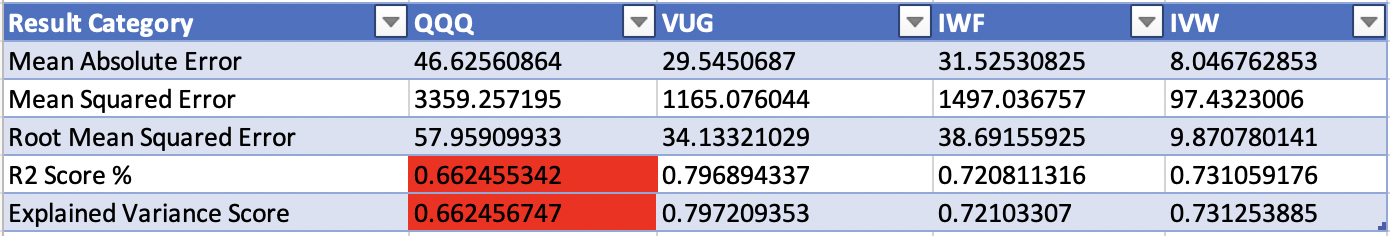

# Step 13 - Conclusion

The linear regression / machine learning model was trained efficiently as it accurately predicted the odds of share price (from any of the top 4 large growth funds - QQQ, VUG, IWF, IVW) increment in the future or 'tomorrow'. Realistically nobody can predict future prices for certain but we are aware (as seen in the financial analysis' Moving Averages graphs - Jupyter Notebooks 1 through 3) that Index Funds tend to increase in value with respect to time despite economic downturns or outlying events (such COVID Pandemic). R2 score & variance score were higher than 70% for most models, except for QQQ's linear regression with 66%. The models predict prices to continue increasing throughout the years, however, error is expected to be high as the market has plenty of ups & downs - therefore multiple data points' predictions are inaccurate. Not surprisingly, error scores were very high for every model as Growth funds tend to be more volatile than Blend & Value categories.